In [2]:
import numpy as np

# 4.2

In [276]:
H = np.array([8, 10, 15, 20, 30, 40, 60, 80])
B = np.array([13.0, 14.0, 15.4, 16.3, 17.2, 17.8, 18.5, 18.8])

B = H / (a + bH)

1/B = a/H + b

In [290]:
a = [0,1]
b = [0,1]

n = 8

while abs(a[0] - a[1]) > 1e-6 or abs(b[0] - b[1]) > 1e-6:
    rho = [1/(a[1] + b[1]*H[i])**2 for i in range(n)]
    
    A = np.zeros((2,2))
    f = np.zeros(2)
    
    for i in range(n):
        A[0][0] += rho[i]*B[i]**2
        A[0][1] += rho[i]*H[i]*B[i]**2
        A[1][1] += rho[i]*B[i]**2 * H[i]**2
        f[0] += rho[i]*H[i]*B[i]
        f[1] += rho[i]*B[i]*H[i]**2
        
    A[1][0] = A[0][1]
    
    a[0] = a[1]
    b[0] = b[1]
    
    a[1], b[1] = np.linalg.solve(A, f)
    print(a[1], b[1])

0.20950567929116456 0.05078825348724912
0.21018222869256836 0.05075954647754716
0.21018541135667818 0.050759415408532765
0.21018542626637415 0.05075941479459941


Text(0, 0.5, 'B')

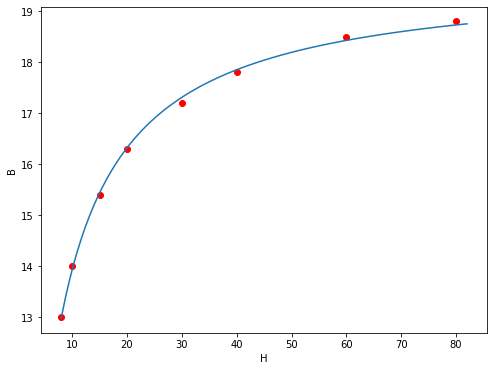

In [291]:
import matplotlib.pyplot as plt

def f(x):
    return x / (a[1] + b[1]*x)

x = np.linspace(8, 82, 100)

plt.figure(figsize=(8, 6))

plt.plot(x, f(x))

plt.scatter(H, B, color="red")

plt.xlabel("H")
plt.ylabel("B")

# 4.6

In [13]:
x = np.empty(4)
for i in range(4):
    x[i] = np.cos(np.pi * (1+2*i)/8)
    
y = np.array([2,1,3,0])
x, y

(array([ 0.92387953,  0.38268343, -0.38268343, -0.92387953]),
 array([2, 1, 3, 0]))

In [65]:
def phi(i, x):
    if i == 0:
        return 1 + 0*x
    if i == 1:
        return x
    if i == 2:
        return 2*np.power(x, 2) - 1
    if i == 3:
        return 4*np.power(x, 3) -3*x
    

In [66]:
c = np.zeros((5,5))

for k in range(1,5):
    A = np.zeros((k,k))
    f = np.empty(k)

    for i in range(k):
        A[i][i] = np.dot(phi(i,x), phi(i,x))
        f[i] = np.dot(phi(i,x), y)
        
    c[k-1][0:k] = np.linalg.solve(A, f)
    
c

array([[ 1.5       ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.5       ,  0.5411961 ,  0.        ,  0.        ,  0.        ],
       [ 1.5       ,  0.5411961 , -0.70710678,  0.        ,  0.        ],
       [ 1.5       ,  0.5411961 , -0.70710678,  1.30656296,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [67]:
def plotting(n, x):
    res = 0*x
    for i in range(n+1):
        res += c[n][i]*phi(i, x)
    return res

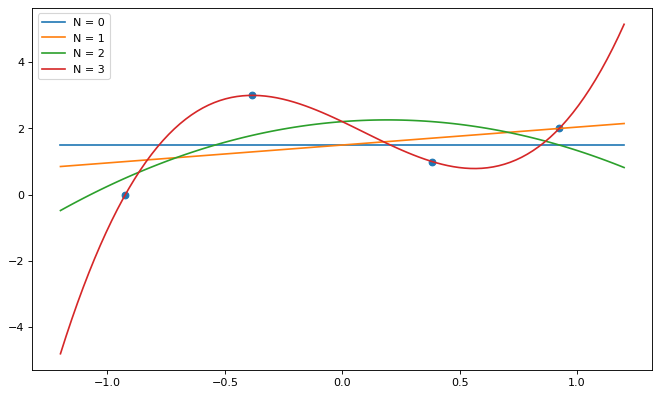

In [68]:
plt.figure(figsize=(10, 6), dpi=80)

x_0 = np.linspace(-1.2, 1.2, 100)

plt.scatter(x, y)

for i in range(0,4):
    plt.plot(x_0, plotting(i, x_0), label="N = "+ str(i))
#     print(i, "  ", '{0:10e}'.format(np.sqrt(np.sum(np.square(y - plotting1(i, x))))))
    

plt.legend()

In [70]:
err= np.zeros((4,4))

for i in range(4):
    err[i] = y - plotting(i, x)
    
print(err)
for i in range(4):
    print(i, "  ", np.sum(np.square(err[i])))
    

[[ 5.00000000e-01 -5.00000000e-01  1.50000000e+00 -1.50000000e+00]
 [ 0.00000000e+00 -7.07106781e-01  1.70710678e+00 -1.00000000e+00]
 [ 5.00000000e-01 -1.20710678e+00  1.20710678e+00 -5.00000000e-01]
 [-4.44089210e-16 -4.44089210e-16  0.00000000e+00  5.55111512e-16]]
0    5.0
1    4.414213562373095
2    3.414213562373095
3    7.025792437124636e-31


#### k = 3 оптимальное приближение 

# 5.11 б

In [85]:
A = [[3,2],[7/3, 1.5]]
f = [2*np.log(2), 1]

a, b = np.linalg.solve(A, f)

def f(x):
    return a*x +b

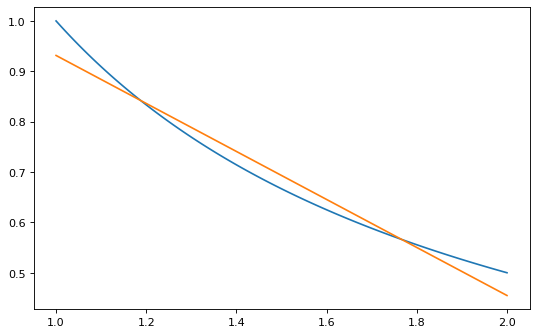

In [86]:
plt.figure(figsize=(8, 5), dpi=80)

x = np.linspace(1,2,100)

plt.plot(x, 1/x)
plt.plot(x, f(x))

# 5.12 ав

In [138]:
x = np.arange(1910., 2010., 10)
print(x)

y = np.array([ 92228496. , 106021537,  123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 
              248709873,  281421906])
print(y)

[1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000.]
[9.22284960e+07 1.06021537e+08 1.23202624e+08 1.32164569e+08
 1.51325798e+08 1.79323175e+08 2.03211926e+08 2.26545805e+08
 2.48709873e+08 2.81421906e+08]


In [154]:
def phi1(k, x):
    return np.power(x, k)

def phi2(k, x):
    return  np.power(x-1955, k)


In [220]:
c1 = np.zeros((6,6))

for k in range(3,7):
    A = np.empty((k,k))
    f = np.empty(k)

    for i in range(k):
        for j in range(i, k):
            A[i][j]  = np.dot(phi1(i, x), phi1(j,x))
            A[j][i] = A[i][j]
        f[i] = np.dot(phi1(i,x), y)
        
    c1[k-1][0:k] = np.linalg.solve(A, f)
    
c1

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.55745003e+10, -3.83202594e+07,  1.03367965e+04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.35895148e+11, -4.99288167e+08,  2.46156137e+05,
        -4.02079013e+01,  0.00000000e+00,  0.00000000e+00],
       [-1.75045615e+12,  3.77103197e+09, -3.03121674e+06,
         1.07760705e+03, -1.42957321e-01,  0.00000000e+00],
       [-2.22711056e+12,  3.08676510e+09, -3.83051245e+05,
        -1.27369577e+03,  7.13315106e-01, -1.13669069e-04]])

In [222]:
c2 = np.zeros((6,6))

for k in range(3,7):
    A = np.empty((k,k))
    f = np.empty(k)

    for i in range(k):
        for j in range(i, k):
            A[i][j]  = np.dot(phi2(i, x), phi2(j,x))
            A[j][i] = A[i][j]
        f[i] = np.dot(phi2(i,x), y)
        
    c2[k-1][0:k] = np.linalg.solve(A, f)
    
c2

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.65887714e+08,  2.09661478e+06,  1.03367964e+04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.65887714e+08,  2.15551115e+06,  1.03367964e+04,
        -4.02022941e+01,  0.00000000e+00,  0.00000000e+00],
       [ 1.65421570e+08,  2.15551115e+06,  1.23167929e+04,
        -4.02022941e+01, -9.65851952e-01,  0.00000000e+00],
       [ 1.65421570e+08,  2.46400145e+06,  1.23167929e+04,
        -6.70708267e+02, -9.65851952e-01,  2.44066828e-01]])

In [175]:
# A2 = np.empty((6,6))
# f2 = np.empty(6)

# for i in range(6):
#     for j in range(i, 6):
#         A2[i][j]  = np.dot(phi2(i, x), phi2(j,x))
#         A2[j][i] = A2[i][j]
#     f2[i] = np.dot(phi2(i,x), y)

    
# c2 = np.linalg.solve(A2, f2)


In [211]:
def plotting1(n, x):
    res = 0*x
    for i in range(n+1):
        res += c1[n][i]*phi1(i, x)
    return res

In [226]:
def plotting2(n, x):
    res = 0*x
    for i in range(n+1):
        res += c2[n][i]*phi2(i, x)
    return res

2    9.215391e+06
3    8.940427e+06
4    8.916839e+06
5    8.886471e+06


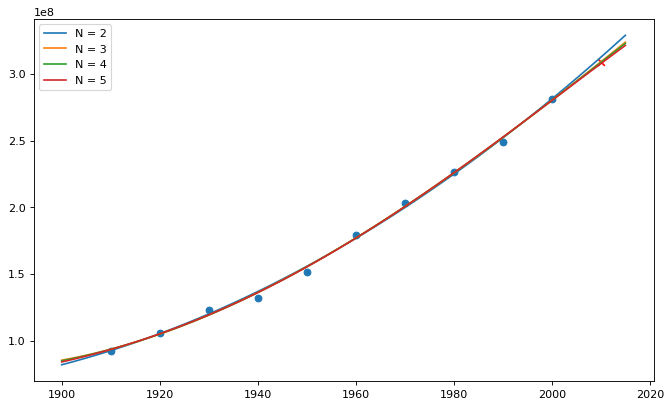

In [260]:
plt.figure(figsize=(10, 6), dpi=80)

x_0 = np.linspace(1900, 2015, 100)

plt.scatter(x, y)

for i in range(2,6):
    plt.plot(x_0, plotting1(i, x_0), label="N = "+ str(i))
    print(i, "  ", '{0:10e}'.format(np.sqrt(np.sum(np.square(y - plotting1(i, x))))))
    
plt.scatter(2010, 308745538, color="red", marker="x")

plt.legend()

2    9.215391e+06
3    8.940427e+06
4    8.854065e+06
5    5.650747e+06


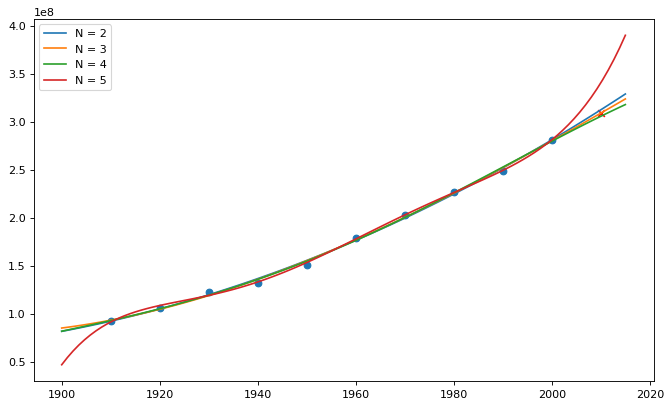

In [259]:
plt.figure(figsize=(10, 6), dpi=80)

x_0 = np.linspace(1900, 2015, 100)

plt.scatter(x, y)

for i in range(2,6):
    plt.plot(x_0, plotting2(i, x_0), label="N = "+ str(i))
    print(i, "  ", '{0:10e}'.format(np.sqrt(np.sum(np.square(y - plotting2(i, x))))) )

    
plt.legend()
plt.scatter(2010, 308745538, color="red", marker="x")
